## **Regressions:**

In [2]:
import pandas as pd

#### **Proof of Concept: A basic multiple regression on unit cell volume on ~300 materials.**

In [4]:
pd.read_excel("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/superconductors-machine-learning/datasets/only_stable_mp_matches.xlsx")

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,material_dict_queried,matches_by_element,matches_by_dict,mp_ids,unit_cell_volumes
0,[18852],Ag1B2,Ag1B2,"{'Ag': 1.0, 'B': 2.0}",6.7,6.700000,0.000000,1,"{'Ag': 1.0, 'B': 2.0}",[],[],[],[]
1,[20016],Ag1Ba2Ca2Cu3O9-z,Ag1Ba2Ca2Cu3O9,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 2.0, 'Cu': 3.0, '...",110,110.000000,0.000000,1,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 2.0, 'Cu': 3.0, '...",[],[],[],[]
2,[20017],Ag1Ba2Ca3Cu4O11-z,Ag1Ba2Ca3Cu4O11,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 3.0, 'Cu': 4.0, '...",117,117.000000,0.000000,1,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 3.0, 'Cu': 4.0, '...",[],[],[],[]
3,[20018],Ag1Ba2Ca4Cu5O13-z,Ag1Ba2Ca4Cu5O13,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 4.0, 'Cu': 5.0, '...",105,105.000000,0.000000,1,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 4.0, 'Cu': 5.0, '...",[],[],[],[]
4,[20019],Ag1Ba2Ca5Cu6O15-z,Ag1Ba2Ca5Cu6O15,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 5.0, 'Cu': 6.0, '...",80,80.000000,0.000000,1,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 5.0, 'Cu': 6.0, '...",[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,"[11721, 12140, 14375, 17473, 17493, 18816]",Y1,Y1,{'Y': 1.0},19.5,7.700000,7.500889,6,{'Y': 1.0},['Y'],['Y'],[MPID(mp-1187739)],[100.68328614538838]
2101,[25802],Yb1,Yb1,{'Yb': 1.0},1.04,1.040000,0.000000,1,{'Yb': 1.0},['Yb'],['Yb'],[MPID(mp-972364)],[119.00175013737812]
2102,"[11452, 14374, 19814, 20650, 20826]",Zn1,Zn1,{'Zn': 1.0},0.867,0.850800,0.014034,5,{'Zn': 1.0},['Zn'],['Zn'],[MPID(mp-79)],[28.845108913918352]
2103,"[11397, 16334]",Zn2Zr1,Zn2Zr1,"{'Zn': 2.0, 'Zr': 1.0}",0.6,0.445000,0.155000,2,"{'Zn': 2.0, 'Zr': 1.0}","['ZrZn3', 'ZrZn', 'ZrZn2', 'Zr5Zn39', 'ZrZn22']",['ZrZn2'],[MPID(mp-1401)],[99.55349873010557]


In [56]:
# Goes from a list stored in a df to just the value inside.
fixed_row_volume = []
for index, row in stable_mats_volumes.iterrows():
    volume_str = row['unit_cell_volumes']
    if len(volume_str) > 2:
        fixed_row_volume.append(row['unit_cell_volumes'][1:-1])
    else:
        fixed_row_volume.append(np.nan)
stable_mats_volumes['unit_cell_volumes'] = fixed_row_volume

In [57]:
stable_mats_volumes.head(50)

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,material_dict_queried,matches_by_element,matches_by_dict,mp_ids,unit_cell_volumes
10,"[12795, 12796, 19273]",Ag1La1,Ag1La1,"{'Ag': 1.0, 'La': 1.0}",1.2,1.073333,0.098432,3,"{'Ag': 1.0, 'La': 1.0}","['LaAg', 'LaAg2']",['LaAg'],[MPID(mp-1948)],55.368048972335835
14,"[16568, 20134, 20203, 23088, 25172]",Ag1Sn1Se2,Ag1Sn1Se2,"{'Ag': 1.0, 'Se': 2.0, 'Sn': 1.0}",4.71,4.664000,0.059532,5,"{'Ag': 1.0, 'Se': 2.0, 'Sn': 1.0}","['Ag8SnSe6', 'Ag2SnSe3', 'AgSnSe2']",['AgSnSe2'],[MPID(mp-1229011)],92.3053035439403
15,[12811],Ag1Te3,Ag1Te3,"{'Ag': 1.0, 'Te': 3.0}",2.6,2.600000,0.000000,1,"{'Ag': 1.0, 'Te': 3.0}","['AgTe', 'AgTe3', 'Ag2Te']",['AgTe3'],[MPID(mp-28246)],113.88237041063722
18,[14851],Ag2F1,Ag2F1,"{'Ag': 2.0, 'F': 1.0}",0.066,0.066000,0.000000,1,"{'Ag': 2.0, 'F': 1.0}","['AgF3', 'AgF2', 'AgF', 'Ag2F', 'Ag2F5']",['Ag2F'],[MPID(mp-1391)],44.481336035584704
24,"[11237, 11360]",Ag5Pb2O6,Ag5Pb2O6,"{'Ag': 5.0, 'O': 6.0, 'Pb': 2.0}",0.0524,0.050200,0.002200,2,"{'Ag': 5.0, 'O': 6.0, 'Pb': 2.0}",['Ag5(PbO3)2'],['Ag5(PbO3)2'],[MPID(mp-22286)],198.65882309090384
29,"[11361, 12806, 14853, 20122, 20387, 20388, 224...",Ag7N1O11,Ag7N1O11,"{'Ag': 7.0, 'N': 1.0, 'O': 11.0}",1.04,1.038125,0.004961,8,"{'Ag': 7.0, 'N': 1.0, 'O': 11.0}","['AgNO3', 'Ag7NO11']",['Ag7NO11'],[MPID(mp-37695)],241.20675131700725
30,"[12165, 12547, 12815, 14875, 14876, 18225, 198...",Al1,Al1,{'Al': 1.0},1.8,1.246630,0.188589,10,{'Al': 1.0},['Al'],['Al'],[MPID(mp-134)],16.471717630914863
32,[19340],Al1Sc1Au2,Al1Sc1Au2,"{'Al': 1.0, 'Au': 2.0, 'Sc': 1.0}",4.4,4.400000,0.000000,1,"{'Al': 1.0, 'Au': 2.0, 'Sc': 1.0}",['ScAlAu2'],['ScAlAu2'],[MPID(mp-10873)],70.25506896854472
33,"[12812, 14864]",Al1Au4,Al1Au4,"{'Al': 1.0, 'Au': 4.0}",0.7,0.550000,0.150000,2,"{'Al': 1.0, 'Au': 4.0}","['AlAu4', 'AlAu2', 'AlAu', 'Al2Au']",['AlAu4'],[MPID(mp-1490)],339.8150231225442
35,[21233],Ba1Al1Ge1,Ba1Al1Ge1,"{'Al': 1.0, 'Ba': 1.0, 'Ge': 1.0}",6.3,6.300000,0.000000,1,"{'Al': 1.0, 'Ba': 1.0, 'Ge': 1.0}","['Ba5Al2Ge7', 'Ba7Al4Ge9', 'BaAlGe', 'Ba3(AlGe...",['BaAlGe'],[MPID(mp-13272)],85.77244413152933




`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



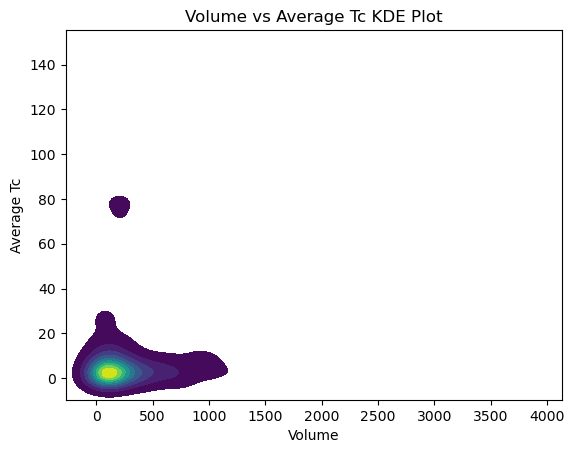

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'unit_cell_volumes' and 'average_Tc' columns to numeric
stable_mats_volumes['unit_cell_volumes'] = pd.to_numeric(stable_mats_volumes['unit_cell_volumes'], errors='coerce')
stable_mats_volumes['average_Tc'] = pd.to_numeric(stable_mats_volumes['average_Tc'], errors='coerce')

# First, let's plot volume - Tc in a KDE plot.
volume = stable_mats_volumes['unit_cell_volumes']
average_tc = stable_mats_volumes['average_Tc']

# Create the KDE plot
sns.kdeplot(data=stable_mats_volumes, x=volume, y=average_tc, cmap='viridis', shade=True,
            shade_lowest=False, levels=10, bw_method=0.3)

# Set plot labels and title
plt.xlabel('Volume')
plt.ylabel('Average Tc')
plt.title('Volume vs Average Tc KDE Plot')

# Show the plot
plt.show()


In [78]:
print(stable_mats_volumes['unit_cell_volumes'].dtype)
print(stable_mats_volumes['average_Tc'].dtype)

float64
float64


In [60]:
stable_mats_volumes.head()

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,material_dict_queried,matches_by_element,matches_by_dict,mp_ids,unit_cell_volumes
10,"[12795, 12796, 19273]",Ag1La1,Ag1La1,"{'Ag': 1.0, 'La': 1.0}",1.2,1.073333,0.098432,3,"{'Ag': 1.0, 'La': 1.0}","['LaAg', 'LaAg2']",['LaAg'],[MPID(mp-1948)],55.368049
14,"[16568, 20134, 20203, 23088, 25172]",Ag1Sn1Se2,Ag1Sn1Se2,"{'Ag': 1.0, 'Se': 2.0, 'Sn': 1.0}",4.71,4.664000,0.059532,5,"{'Ag': 1.0, 'Se': 2.0, 'Sn': 1.0}","['Ag8SnSe6', 'Ag2SnSe3', 'AgSnSe2']",['AgSnSe2'],[MPID(mp-1229011)],92.305304
15,[12811],Ag1Te3,Ag1Te3,"{'Ag': 1.0, 'Te': 3.0}",2.6,2.600000,0.000000,1,"{'Ag': 1.0, 'Te': 3.0}","['AgTe', 'AgTe3', 'Ag2Te']",['AgTe3'],[MPID(mp-28246)],113.882370
18,[14851],Ag2F1,Ag2F1,"{'Ag': 2.0, 'F': 1.0}",0.066,0.066000,0.000000,1,"{'Ag': 2.0, 'F': 1.0}","['AgF3', 'AgF2', 'AgF', 'Ag2F', 'Ag2F5']",['Ag2F'],[MPID(mp-1391)],44.481336
24,"[11237, 11360]",Ag5Pb2O6,Ag5Pb2O6,"{'Ag': 5.0, 'O': 6.0, 'Pb': 2.0}",0.0524,0.050200,0.002200,2,"{'Ag': 5.0, 'O': 6.0, 'Pb': 2.0}",['Ag5(PbO3)2'],['Ag5(PbO3)2'],[MPID(mp-22286)],198.658823


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_evaluate_regression_model(X, y, model):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train.values.reshape(-1, 1), y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test.values.reshape(-1, 1))

    # Evaluate the model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    return rmse, r2

# Get lists of the variables.
volume = stable_mats_volumes['unit_cell_volumes']
average_tc = stable_mats_volumes['average_Tc']

# Define the regression models
linear_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
tree_reg = DecisionTreeRegressor()

# Train and evaluate the models using the defined function
linear_rmse, linear_r2 = train_evaluate_regression_model(volume, average_tc, linear_reg)
knn_rmse, knn_r2 = train_evaluate_regression_model(volume, average_tc, knn_reg)
tree_rmse, tree_r2 = train_evaluate_regression_model(volume, average_tc, tree_reg)

# Store the evaluation metrics.
print("Linear Regression:")
print("RMSE:", linear_rmse)
print("R2 Score:", linear_r2)
print()

print("K-Nearest Neighbors Regression:")
print("RMSE:", knn_rmse)
print("R2 Score:", knn_r2)
print()

print("Decision Tree Regression:")
print("RMSE:", tree_rmse)
print("R2 Score:", tree_r2)

Linear Regression:
RMSE: 7.021435612445421
R2 Score: -0.005835943042516112

K-Nearest Neighbors Regression:
RMSE: 8.24122305662634
R2 Score: -0.38566629510536066

Decision Tree Regression:
RMSE: 12.682644757274419
R2 Score: -2.2816704881008607


There is no obvious way to incorporate the statistics of highest Tc and standard deviation. For one, std. dev is often zero (since there is usually only one match in SuperCon). Also, highest Tc and avg Tc are near perfect correlates of each other.